<a href="https://colab.research.google.com/github/sakib762/Machine-Learning-Experiment/blob/main/Big_Mart_Sales_Prediction_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING DEPENDENCIES**

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

**DATA COLLECTION AND ANALYSIS**

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
df = pd.read_csv('/content/drive/MyDrive/database/ML Project Database/Train.csv')


In [109]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [110]:
#number of data points and feature
df.shape

(8523, 12)

In [111]:
#information about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Chategorical feature**

*   Item_Identifier
*   Item_Fat_Content
*   Item_Type  

*  Outlet_Identifier

*    Outlet_Size
*   Outlet_Location_Type


*   Outlet_Type





In [112]:
#checking for missing values
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


# Handling Missing value

mean = average value


mode = most repeated value

In [113]:
#mean value of item weight column
df['Item_Weight'].mean()

12.857645184135976

In [114]:
#filling the missing value with mean value
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)


<ipython-input-114-c25fca05df92>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)


In [115]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [116]:
#replacing the null value in outlet size with mode
mode_of_outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [117]:
#replacing null value with mod
miss_values = df['Outlet_Size'].isnull()
print(miss_values)
df.loc[miss_values, 'Outlet_Size'] = df.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [118]:
df["Outlet_Size"].value_counts()
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


Data Analysis

In [119]:
#statical measures of dataset
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Neumerical Feature**

<ipython-input-120-4304e6149a1e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


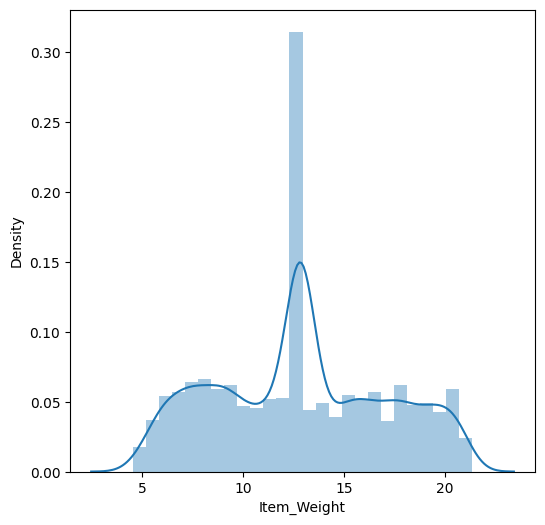

In [120]:
#item weight distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Weight'])
plt.show()

<ipython-input-121-313df2373f2f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'])


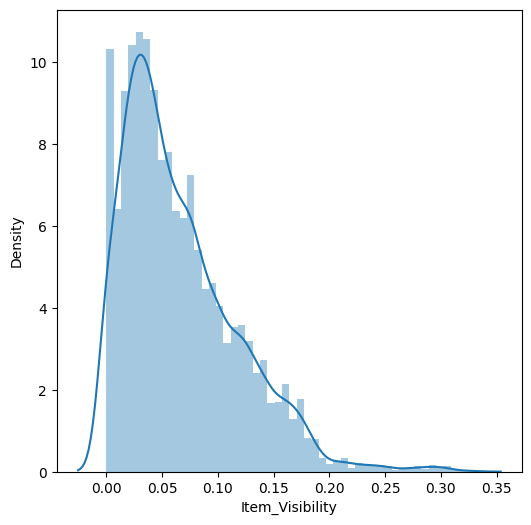

In [121]:
#item visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Visibility'])
plt.show()

<ipython-input-122-7f2a8c94d995>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


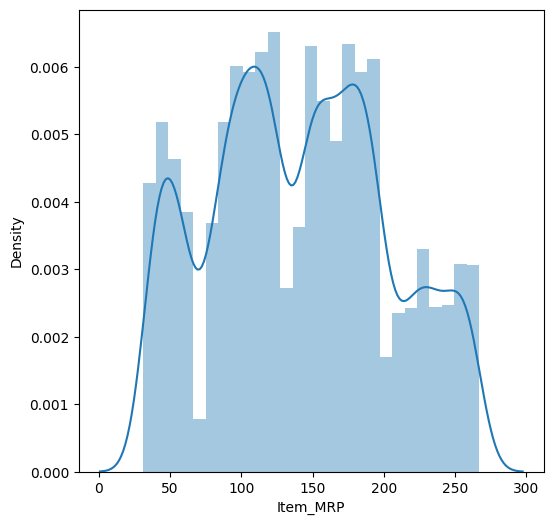

In [122]:
#MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_MRP'])
plt.show()

<ipython-input-123-2286da0d5349>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


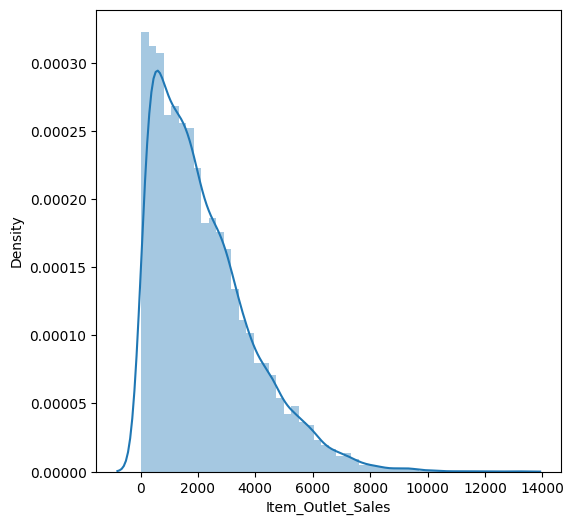

In [123]:
#item outlet sales distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

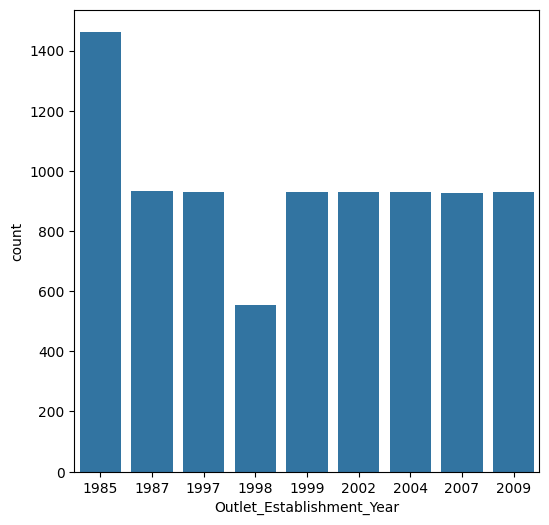

In [124]:
#outlet establishment year countplot
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.show()

**CHATEGORICAL FEATURE**

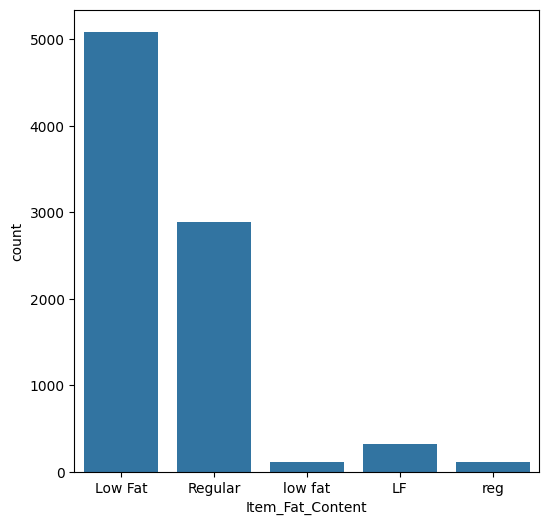

In [125]:
#item fat contain column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

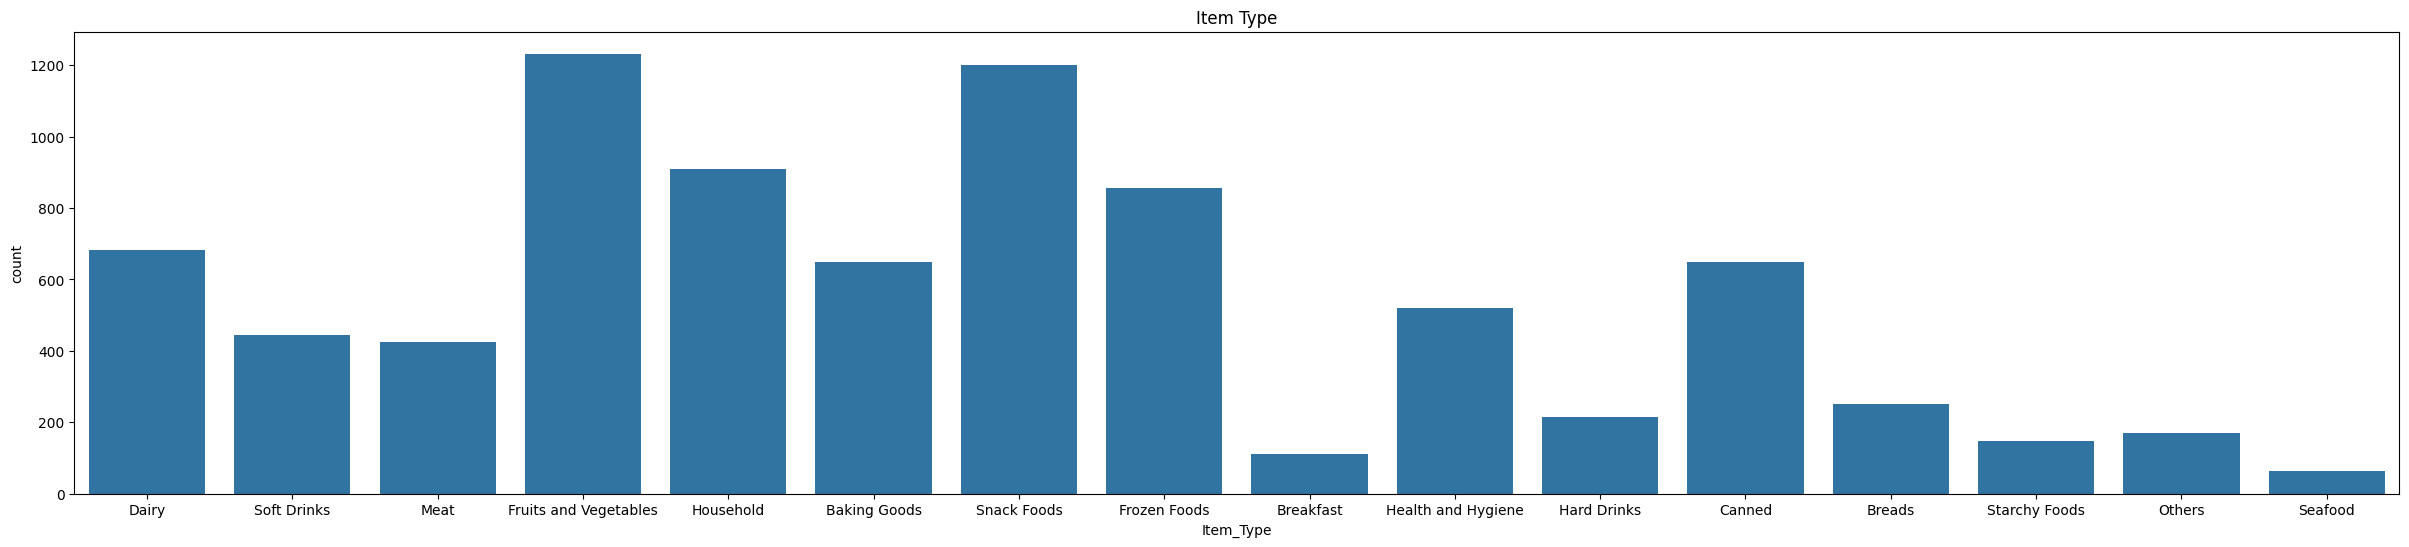

In [126]:
#item type
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=df)
plt.title('Item Type')
plt.show()

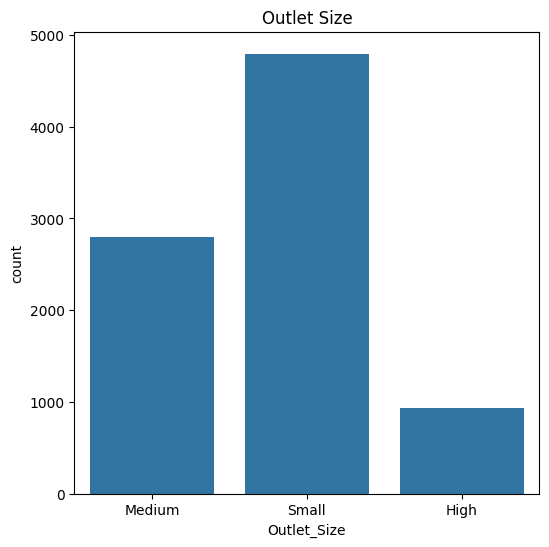

In [127]:
#outlet size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df)
plt.title('Outlet Size')
plt.show()

**Data Preprocessing**

In [128]:
#label encoding
encoder = LabelEncoder()

In [129]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])


In [130]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Spliting Dataset

In [131]:
X = df.drop(columns='Item_Outlet_Sales', axis=1)
Y = df['Item_Outlet_Sales']

In [132]:
#Training data and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [133]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


**Training Machine Learning Model**

In [134]:
#XGBregressor
regressor = XGBRegressor()


In [135]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Evaluation**

In [136]:
#predicting on testing Data
training_data_prediction = regressor.predict(X_train)

In [137]:
#r2 value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared value = ', r2_train)

R Squared value =  0.8765209770391698


In [138]:
#prediction for test data
test_data_prediction = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared value = ', r2_test)

R Squared value =  0.5067790680407587


In [139]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming you have X_training, y_training, X_testing, y_testing already defined

# Define regressors
regressors = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42),
    "Lasso Regression": Lasso(random_state=42),
    "ElasticNet Regression": ElasticNet(random_state=42),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
    "Random Forest Regression": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(random_state=42),
    "Support Vector Regression (SVR)": SVR(kernel='rbf'),
    "K-Nearest Neighbors Regression": KNeighborsRegressor(n_neighbors=5)
}

# Store results
results = {}

# Iterate through regressors
for name, model in regressors.items():
    print(f"Training and evaluating: {name}")

    # Train the model
    model.fit(X_train, Y_train)

    # Predictions
    Y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Store results
    results[name] = {
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    }

# Print or use the results
for name, metrics in results.items():
    print(f"\n{name} Metrics:")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  MAE: {metrics['MAE']:.4f}")
    print(f"  R2: {metrics['R2']:.4f}")

#Example of how to access a specific models results.
print(f"\nRandom Forest MSE: {results['Random Forest Regression']['MSE']:.4f}")

Training and evaluating: Linear Regression
Training and evaluating: Ridge Regression
Training and evaluating: Lasso Regression
Training and evaluating: ElasticNet Regression
Training and evaluating: Decision Tree Regression
Training and evaluating: Random Forest Regression
Training and evaluating: Gradient Boosting Regression
Training and evaluating: Support Vector Regression (SVR)
Training and evaluating: K-Nearest Neighbors Regression

Linear Regression Metrics:
  MSE: 1577821.7226
  MAE: 945.5733
  R2: 0.4889

Ridge Regression Metrics:
  MSE: 1578077.6741
  MAE: 945.7184
  R2: 0.4888

Lasso Regression Metrics:
  MSE: 1579553.4690
  MAE: 946.4806
  R2: 0.4883

ElasticNet Regression Metrics:
  MSE: 1673960.7369
  MAE: 963.5336
  R2: 0.4578

Decision Tree Regression Metrics:
  MSE: 2471959.6330
  MAE: 1098.9761
  R2: 0.1993

Random Forest Regression Metrics:
  MSE: 1380844.3834
  MAE: 825.0207
  R2: 0.5527

Gradient Boosting Regression Metrics:
  MSE: 1275403.1020
  MAE: 790.3339
  R2:

Feature selecting for better performance

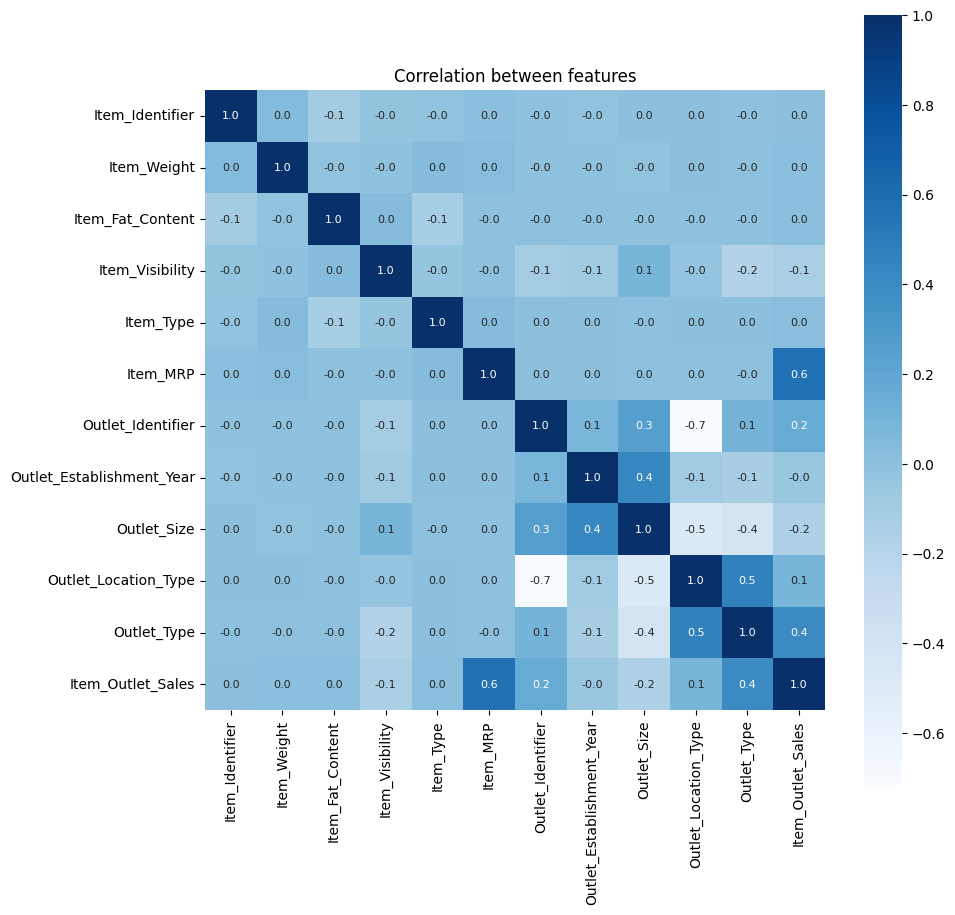

In [140]:
#using correlation to select feature
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.title('Correlation between features')
plt.show()

In [141]:
#removing unneccessary features
df.drop(columns=["Item_Visibility","Outlet_Size"], axis=1, inplace=True)

In [142]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,4,249.8092,9,1999,0,1,3735.1380
1,8,5.920,2,14,48.2692,3,2009,2,2,443.4228
2,662,17.500,1,10,141.6180,9,1999,0,1,2097.2700
3,1121,19.200,2,6,182.0950,0,1998,2,0,732.3800
4,1297,8.930,1,9,53.8614,1,1987,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,13,214.5218,1,1987,2,1,2778.3834
8519,897,8.380,2,0,108.1570,7,2002,1,1,549.2850
8520,1357,10.600,1,8,85.1224,6,2004,1,1,1193.1136
8521,681,7.210,2,13,103.1332,3,2009,2,2,1845.5976


**Using Multiple Regressor Model**

In [143]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming you have X_training, y_training, X_testing, y_testing already defined

# Define regressors
regressors = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42),
    "Lasso Regression": Lasso(random_state=42),
    "ElasticNet Regression": ElasticNet(random_state=42),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
    "Random Forest Regression": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(random_state=42),
    "Support Vector Regression (SVR)": SVR(kernel='rbf'),
    "K-Nearest Neighbors Regression": KNeighborsRegressor(n_neighbors=5)
}

# Store results
results = {}

# Iterate through regressors
for name, model in regressors.items():
    print(f"Training and evaluating: {name}")

    # Train the model
    model.fit(X_train, Y_train)

    # Predictions
    Y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Store results
    results[name] = {
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    }

# Print or use the results
for name, metrics in results.items():
    print(f"\n{name} Metrics:")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  MAE: {metrics['MAE']:.4f}")
    print(f"  R2: {metrics['R2']:.4f}")

#Example of how to access a specific models results.
print(f"\nRandom Forest MSE: {results['Random Forest Regression']['MSE']:.4f}")

Training and evaluating: Linear Regression
Training and evaluating: Ridge Regression
Training and evaluating: Lasso Regression
Training and evaluating: ElasticNet Regression
Training and evaluating: Decision Tree Regression
Training and evaluating: Random Forest Regression
Training and evaluating: Gradient Boosting Regression
Training and evaluating: Support Vector Regression (SVR)
Training and evaluating: K-Nearest Neighbors Regression

Linear Regression Metrics:
  MSE: 1577821.7226
  MAE: 945.5733
  R2: 0.4889

Ridge Regression Metrics:
  MSE: 1578077.6741
  MAE: 945.7184
  R2: 0.4888

Lasso Regression Metrics:
  MSE: 1579553.4690
  MAE: 946.4806
  R2: 0.4883

ElasticNet Regression Metrics:
  MSE: 1673960.7369
  MAE: 963.5336
  R2: 0.4578

Decision Tree Regression Metrics:
  MSE: 2471959.6330
  MAE: 1098.9761
  R2: 0.1993

Random Forest Regression Metrics:
  MSE: 1380844.3834
  MAE: 825.0207
  R2: 0.5527

Gradient Boosting Regression Metrics:
  MSE: 1275403.1020
  MAE: 790.3339
  R2:

Unable to increase performance